# Analysis on Listening music in Different Age groups 

The Data is a comprehensive collection of anonymized data that offers valuable insights into the behavior patterns and preferences of Spotify users. The data tells about how they are using the Spotify, what influence them to listen the music, time slot for listening the music. By listening the music whether the user's mood changes or not. What type of music and podcast are most likely to listen.

### Understanding the Dataset

The Dataset have 520 rows and 18 columns. Each column is described below.

* Age : Age of each User
* Gender : Gender of each User
* Spotify_usage_period : How long have you been using Spotify?
* Hours per day : How much time have they listening music in a day?
* Spotify_listening_device : Which of the following devices do you primarily use to listen to Spotify?
* Preferred_listening_content :  What do you prefer to listen more?
* Fav_music_genre : What genre(s) of music do you enjoy the most?
* Music_time_slot :  What is your favourite time slot to listen to music?
* Music_influence_mood : When it comes to listening to music, which of the following moods or situations most strongly influences your choice of music?
* Music_lis_frequency : When do you listen to music more often?
* Music_expl_method : How do you discover new music on Spotify?
* Music_recc_rating :  How do you rate the spotify music recommendations?
* Pod_lis_frequency : How often do you listen to Podcast?
* Fav_pod_genre : What genre(s) of Podcast do you enjoy the most?
* Pod_host_preference : Are you more inclined to listen to podcasts from unknown personalities, or do you prefer podcasts hosted by well-known individuals?
* Pod_variety_satisfaction : Are you satisfied with the variety and availability of podcasts on Spotify?
* Music_effects : Whether it is helpful to change your mood?
* Unnamed 17 : unwanted column.


## Data Preparation and Cleaning

Data Cleaning is an important step and time-consuming step in data analysis. Formatting issues (e.g., rows and
columns merged), missing data, duplicated rows, spelling mistakes, and so on could all be present. These
challenges could make data analysis complex. Here we will address some of those.

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore') # if there are any warnings due to version mismatch, it will ingore all the warnings. 

### Load the Dataset

In [3]:
ds= pd.read_csv('Music_dataset.csv')
ds

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_host_preference,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Both,Ok,NaN
1,63.0,Male,More than 2 years,1.5,Computer or laptop,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Both,Satisfied,NaN
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,None,Satisfied,No effect
3,61.0,Female,1 year to 2 years,2.5,"Smartphone, Smart speakers or voice assistants",Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,Ok,Improve
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Well known individuals,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Both,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Both,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Both,Ok,Improve
1558,56.0,Female,6 months to 1 year,8.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Both,Satisfied,Improve


### Some Basic Functions

In [4]:
# shape :- to find the number of columns and number of rows.

ds.shape

(1560, 17)

In [5]:
#columns :- To find the column names.

ds.columns

Index(['Age', 'Gender', 'spotify_usage_period', 'Hours per day',
       'spotify_listening_device', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'pod_host_preference',
       'pod_variety_satisfaction', 'Music effects'],
      dtype='object')

In [6]:
# head() :- to display the first five rows in the dataset.

ds.head()

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_host_preference,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Both,Ok,NaN
1,63.0,Male,More than 2 years,1.5,Computer or laptop,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Both,Satisfied,NaN
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,None,Satisfied,No effect
3,61.0,Female,1 year to 2 years,2.5,"Smartphone, Smart speakers or voice assistants",Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,Ok,Improve
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Well known individuals,Ok,Improve


In [7]:
# tail() :- to display the last five rows in the dataset

ds.tail()

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_host_preference,pod_variety_satisfaction,Music effects
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Both,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Both,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Both,Ok,Improve
1558,56.0,Female,6 months to 1 year,8.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Both,Satisfied,Improve
1559,20.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Sadness or melan...","Office hours,Study Hours, While Traveling, lei...","Playlists, Radio",3,Never,None,None,Ok,Improve


In [8]:
# info() :- gives the details about the datatype and non-Null Count

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1557 non-null   float64
 1   Gender                       1560 non-null   object 
 2   spotify_usage_period         1560 non-null   object 
 3   Hours per day                1560 non-null   float64
 4   spotify_listening_device     1560 non-null   object 
 5   preferred_listening_content  1560 non-null   object 
 6   fav_music_genre              1560 non-null   object 
 7   music_time_slot              1560 non-null   object 
 8   music_Influencial_mood       1560 non-null   object 
 9   music_lis_frequency          1560 non-null   object 
 10  music_expl_method            1560 non-null   object 
 11  music_recc_rating            1560 non-null   int64  
 12  pod_lis_frequency            1560 non-null   object 
 13  fav_pod_genre     

In [9]:
# value_counts() :- It counts the number of times a particular item repeated in a specific column.

ds['Music effects'].value_counts()

Improve      1155
No effect     354
Worsen         33
Name: Music effects, dtype: int64

In [10]:
ds['Gender'].value_counts()

Female    1173
Male       342
Others      45
Name: Gender, dtype: int64

In [11]:
ds['music_Influencial_mood'].value_counts()

Relaxation and stress relief                                                                                     585
Uplifting and motivational                                                                                       201
Sadness or melancholy                                                                                            165
Relaxation and stress relief, Uplifting and motivational                                                         132
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties    105
Relaxation and stress relief, Sadness or melancholy                                                               99
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy                                   66
Social gatherings or parties                                                                                      48
Relaxation and stress relief, Uplifting and motivational, Social

In [12]:
ds['fav_music_genre'].value_counts()

Melody                       777
classical                    261
Pop                          255
Rap                          165
Electronic/Dance              48
All                           18
Rock                          12
Kpop                          12
Classical & melody, dance      6
Old songs                      3
trending songs random          3
Name: fav_music_genre, dtype: int64

In [13]:
ds['music_recc_rating'].value_counts()

3    570
4    522
5    258
2    168
1     42
Name: music_recc_rating, dtype: int64

In [14]:
ds['pod_lis_frequency'].value_counts()

Rarely                  603
Never                   390
Once a week             273
Several times a week    234
Daily                    60
Name: pod_lis_frequency, dtype: int64

In [15]:
ds.rename(columns={'music_lis_frequency':'frequently_lis_music'},inplace=True)
ds

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_host_preference,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Both,Ok,NaN
1,63.0,Male,More than 2 years,1.5,Computer or laptop,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Both,Satisfied,NaN
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,None,Satisfied,No effect
3,61.0,Female,1 year to 2 years,2.5,"Smartphone, Smart speakers or voice assistants",Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,Ok,Improve
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Well known individuals,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Both,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Both,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Both,Ok,Improve
1558,56.0,Female,6 months to 1 year,8.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Both,Satisfied,Improve


### Data Cleaning

In [16]:
# isnull() :- It shows  the null values present in the columns as True(if it is null) and False(if it is non-null)
# sum() :- It add the count of the null values present in the columns 

ds.isnull().sum()

Age                             3
Gender                          0
spotify_usage_period            0
Hours per day                   0
spotify_listening_device        0
preferred_listening_content     0
fav_music_genre                 0
music_time_slot                 0
music_Influencial_mood          0
frequently_lis_music            0
music_expl_method               0
music_recc_rating               0
pod_lis_frequency               0
fav_pod_genre                   0
pod_host_preference             0
pod_variety_satisfaction        0
Music effects                  18
dtype: int64

In [17]:
# It is used to find the mean of remaining data

ds['Age'].mean().round(0)

25.0

<Axes: >

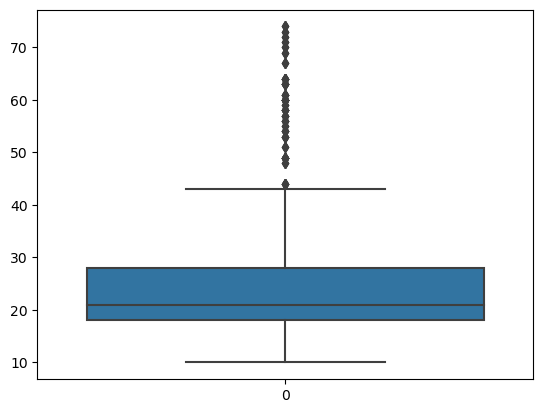

In [18]:
# Lets draw the Box plot for Age column to find the Outliers 

sns.boxplot(ds['Age'])

In [19]:
# Cleaning the Outliers from the data
ds1 = ds[ds['Age']<=43]
ds1

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_host_preference,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Both,Ok,NaN
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,None,Satisfied,No effect
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Well known individuals,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,None,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,43.0,Female,More than 2 years,1.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Both,Satisfied,Improve
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Both,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Both,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Both,Ok,Improve


In [20]:
ds1.shape

(1434, 17)

<Axes: >

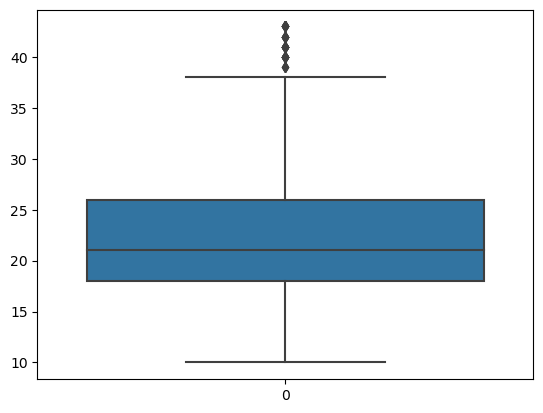

In [21]:
# after cleaning the Outliers(i.e age greater than 43), lets draw the boxplot

sns.boxplot(ds1['Age'])

In [22]:
# to fill null values

ds1['Age'].fillna(ds1['Age'].mean().round(0),inplace=True)
ds1

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_host_preference,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Both,Ok,NaN
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,None,Satisfied,No effect
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Well known individuals,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,None,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,43.0,Female,More than 2 years,1.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Both,Satisfied,Improve
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Both,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Both,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Both,Ok,Improve


In [23]:
ds1['Music effects'].fillna('Improve',inplace=True)
ds1

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_host_preference,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Both,Ok,Improve
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,None,Satisfied,No effect
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Well known individuals,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,None,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,43.0,Female,More than 2 years,1.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Both,Satisfied,Improve
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Both,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Both,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Both,Ok,Improve


In [24]:
ds1.isnull().sum()

Age                            0
Gender                         0
spotify_usage_period           0
Hours per day                  0
spotify_listening_device       0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
frequently_lis_music           0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
pod_host_preference            0
pod_variety_satisfaction       0
Music effects                  0
dtype: int64

In [25]:
ds1.shape

(1434, 17)

In [26]:
ds1

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_host_preference,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Both,Ok,Improve
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,None,Satisfied,No effect
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Well known individuals,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,None,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,43.0,Female,More than 2 years,1.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Both,Satisfied,Improve
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Both,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Both,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Both,Ok,Improve


In [27]:
ds1.drop(['pod_host_preference'],axis=1,inplace=True)
ds1

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Ok,Improve
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Satisfied,No effect
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,43.0,Female,More than 2 years,1.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Satisfied,Improve
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Ok,Improve


In [28]:
ds1.shape

(1434, 16)

In [29]:
ds1.isnull().sum()

Age                            0
Gender                         0
spotify_usage_period           0
Hours per day                  0
spotify_listening_device       0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
frequently_lis_music           0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
pod_variety_satisfaction       0
Music effects                  0
dtype: int64

### Data Filtering

In [30]:
ds2=ds1[ds1["Age"] < 15]
ds2

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
26,14.0,Male,6 months to 1 year,12.0,"Smartphone, Smart speakers or voice assistants",Podcast,Rap,Morning,Relaxation and stress relief,"Office hours, While Traveling, Workout session",recommendations,4,Several times a week,Lifestyle and Health,Satisfied,Improve
86,14.0,Male,6 months to 1 year,7.0,Computer or laptop,Podcast,Rap,Afternoon,Uplifting and motivational,Study Hours,Others,3,Once a week,Sports,Ok,Improve
127,13.0,Female,6 months to 1 year,2.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Sadness or melan...",While Traveling,"recommendations, Others",4,Never,None,Ok,Worsen
230,14.0,Male,1 year to 2 years,2.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,Workout session,recommendations,4,Daily,Sports,Satisfied,Improve
278,14.0,Female,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,classical,Morning,Uplifting and motivational,Study Hours,Radio,3,Several times a week,Health and Fitness,Satisfied,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,14.0,Female,Less than 6 months,9.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,While Traveling,recommendations,3,Rarely,Sports,Satisfied,Improve
1482,13.0,Female,More than 2 years,6.0,"Smartphone, Computer or laptop",Music,Pop,Morning,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,3,Never,None,Ok,Worsen
1488,14.0,Female,6 months to 1 year,2.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,"Office hours, leisure time",Playlists,3,Never,None,Ok,Improve
1527,14.0,Female,1 year to 2 years,2.0,"Computer or laptop, Smart speakers or voice as...",Podcast,Melody,Night,Sadness or melancholy,Study Hours,Radio,3,Once a week,Comedy,Ok,Improve


In [31]:
ds3=ds1[ds1.Gender=="Male"]
ds3

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
5,18.0,Male,More than 2 years,5.0,Smartphone,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,Ok,Improve
21,17.0,Male,More than 2 years,4.0,Smartphone,Music,"Classical & melody, dance",Morning,Relaxation and stress relief,Office hours,recommendations,5,Never,None,Ok,Improve
24,16.0,Male,More than 2 years,3.0,"Smartphone, Computer or laptop",Music,Rock,Night,"Relaxation and stress relief, Sadness or melan...",Study Hours,"recommendations, Radio",3,Rarely,Lifestyle and Health,Ok,Improve
26,14.0,Male,6 months to 1 year,12.0,"Smartphone, Smart speakers or voice assistants",Podcast,Rap,Morning,Relaxation and stress relief,"Office hours, While Traveling, Workout session",recommendations,4,Several times a week,Lifestyle and Health,Satisfied,Improve
27,18.0,Male,Less than 6 months,6.0,Smartphone,Music,Old songs,Night,Relaxation and stress relief,leisure time,recommendations,1,Never,None,Very Dissatisfied,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,14.0,Male,6 months to 1 year,7.0,Computer or laptop,Podcast,classical,Afternoon,Uplifting and motivational,Study Hours,recommendations,3,Several times a week,Lifestyle and Health,Ok,Improve
1537,20.0,Male,1 year to 2 years,3.0,Smart speakers or voice assistants,Podcast,Rap,Afternoon,Sadness or melancholy,While Traveling,Radio,4,Rarely,Sports,Satisfied,Improve
1541,24.0,Male,6 months to 1 year,2.0,Smart speakers or voice assistants,Podcast,classical,Afternoon,Relaxation and stress relief,"While Traveling, leisure time",Radio,3,Once a week,Sports,Very Dissatisfied,Improve
1544,19.0,Male,More than 2 years,2.0,Smart speakers or voice assistants,Podcast,classical,Afternoon,Relaxation and stress relief,Study Hours,Playlists,3,Several times a week,Health and Fitness,Very Satisfied,Improve


In [32]:
ds4=ds1[ds1.music_recc_rating==3]
ds4

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,Ok,Improve
10,18.0,Female,More than 2 years,3.0,Smartphone,Music,Melody,Afternoon,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time",Playlists,3,Several times a week,Lifestyle and Health,Satisfied,No effect
11,19.0,Female,1 year to 2 years,8.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time","recommendations, Playlists",3,Several times a week,Comedy,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,19.0,Male,More than 2 years,2.0,Smart speakers or voice assistants,Podcast,classical,Afternoon,Relaxation and stress relief,Study Hours,Playlists,3,Several times a week,Health and Fitness,Very Satisfied,Improve
1545,25.0,Female,1 year to 2 years,4.0,Wearable devices,Podcast,classical,Morning,Uplifting and motivational,"Office hours, While Traveling","recommendations, Radio",3,Rarely,Health and Fitness,Satisfied,Improve
1547,27.0,Female,Less than 6 months,4.0,Computer or laptop,Podcast,classical,Morning,Uplifting and motivational,"Office hours, Study Hours, While Traveling","Playlists, Radio",3,Rarely,Health and Fitness,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Ok,Improve


In [33]:
ds5=ds1[ds1.spotify_listening_device=="Smartphone"]
ds5

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,Ok,Improve
7,21.0,Female,Less than 6 months,1.0,Smartphone,Music,Melody,Night,Social gatherings or parties,leisure time,recommendations,5,Several times a week,Lifestyle and Health,Satisfied,Improve
8,19.0,Female,Less than 6 months,6.0,Smartphone,Music,Melody,Afternoon,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time","Playlists, Radio",4,Rarely,Comedy,Satisfied,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,27.0,Female,1 year to 2 years,1.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,leisure time,recommendations,3,Rarely,Health and Fitness,Satisfied,Improve
1540,29.0,Female,6 months to 1 year,8.0,Smartphone,Podcast,Rap,Afternoon,Uplifting and motivational,"Office hours, While Traveling","recommendations, Playlists, Others",4,Several times a week,Sports,Satisfied,Improve
1549,25.0,Female,More than 2 years,5.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Sadness or melan...","Study Hours, leisure time","recommendations, Others",4,Rarely,Lifestyle and Health,Ok,Improve
1551,43.0,Female,More than 2 years,1.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Satisfied,Improve


### Data Sorting

In [34]:
ds6=ds1.copy()
ds6

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Ok,Improve
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Satisfied,No effect
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,43.0,Female,More than 2 years,1.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Satisfied,Improve
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Ok,Improve


In [35]:
ds6.sort_values(by='Age',inplace=True)
ds6

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
369,10.0,Female,6 months to 1 year,2.0,Smartphone,Music,Kpop,Night,"Relaxation and stress relief, Sadness or melan...",leisure time,Playlists,3,Never,None,Ok,Improve
1409,10.0,Female,6 months to 1 year,2.0,Smartphone,Music,Kpop,Night,"Relaxation and stress relief, Sadness or melan...",leisure time,Playlists,3,Never,None,Ok,Improve
889,10.0,Female,6 months to 1 year,2.0,Smartphone,Music,Kpop,Night,"Relaxation and stress relief, Sadness or melan...",leisure time,Playlists,3,Never,None,Ok,Improve
384,12.0,Female,Less than 6 months,2.0,Smartphone,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","Study Hours, While Traveling, Workout session,...",Playlists,5,Never,None,Satisfied,Improve
931,12.0,Female,6 months to 1 year,0.5,Smartphone,Music,Rap,Morning,Relaxation and stress relief,While Traveling,recommendations,5,Daily,Health and Fitness,Very Satisfied,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,43.0,Female,More than 2 years,1.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Satisfied,Improve
1551,43.0,Female,More than 2 years,1.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Satisfied,Improve
887,43.0,Female,Less than 6 months,1.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time","recommendations, Playlists, Radio",3,Rarely,Comedy,Satisfied,Improve
1407,43.0,Female,Less than 6 months,1.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time","recommendations, Playlists, Radio",3,Rarely,Comedy,Satisfied,Improve


In [36]:
ds7=ds1.copy()
ds7

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Ok,Improve
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Satisfied,No effect
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,43.0,Female,More than 2 years,1.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Satisfied,Improve
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Ok,Improve


In [37]:
ds7.sort_values(by='music_recc_rating',inplace=True)
ds7

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
200,25.0,Male,Less than 6 months,3.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Sadness or melan...","Office hours, While Traveling","recommendations, Playlists",1,Never,None,Ok,Improve
533,19.0,Female,More than 2 years,2.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Office hours, While Traveling","recommendations, Others",1,Rarely,Comedy,Ok,Improve
421,14.0,Female,Less than 6 months,5.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,recommendations,1,Never,None,Very Dissatisfied,Improve
391,18.0,Female,More than 2 years,5.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,While Traveling,recommendations,1,Rarely,None,Ok,Improve
1461,14.0,Female,Less than 6 months,5.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,recommendations,1,Never,None,Very Dissatisfied,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,28.0,Male,Less than 6 months,4.0,Smartphone,Music,classical,Night,Relaxation and stress relief,While Traveling,recommendations,5,Rarely,Sports,Ok,Improve
1258,20.0,Female,More than 2 years,3.0,Computer or laptop,Music,Melody,Night,Relaxation and stress relief,leisure time,Playlists,5,Rarely,Lifestyle and Health,Satisfied,Improve
400,17.0,Female,1 year to 2 years,2.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Study Hours, While Traveling, leisure time","recommendations, Playlists",5,Never,None,Satisfied,Improve
1254,19.0,Male,More than 2 years,6.0,Smartphone,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session",Playlists,5,Never,None,Dissatisfied,Improve


### Aggregations


In [38]:
ds1

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Ok,Improve
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Satisfied,No effect
4,18.0,Female,1 year to 2 years,4.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,43.0,Female,More than 2 years,1.0,Smartphone,Music,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Satisfied,Improve
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Ok,Improve


In [39]:
ds1.describe()

,Age,Hours per day,music_recc_rating
count,1434.000000,1434.000000,1434.000000
mean,22.472803,3.569979,3.520921
std,6.771901,2.993647,0.982709
min,10.000000,0.000000,1.000000
25%,18.000000,2.000000,3.000000
50%,21.000000,3.000000,4.000000
75%,26.000000,5.000000,4.000000
max,43.000000,24.000000,5.000000


### Replace method

In [40]:
le=LabelEncoder()

In [41]:
ds1['preferred_listening_content']=le.fit_transform(ds1['preferred_listening_content'])
# 0 for Podcast
# 1 for Music

In [42]:
ds1

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,1,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Ok,Improve
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,1,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Satisfied,No effect
4,18.0,Female,1 year to 2 years,4.0,Smartphone,0,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,0,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,0,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,43.0,Female,More than 2 years,1.0,Smartphone,0,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Satisfied,Improve
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",0,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",0,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,0,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Ok,Improve


In [43]:
ds1.describe()

,Age,Hours per day,preferred_listening_content,music_recc_rating
count,1434.000000,1434.000000,1434.000000,1434.000000
mean,22.472803,3.569979,0.200837,3.520921
std,6.771901,2.993647,0.400766,0.982709
min,10.000000,0.000000,0.000000,1.000000
25%,18.000000,2.000000,0.000000,3.000000
50%,21.000000,3.000000,0.000000,4.000000
75%,26.000000,5.000000,0.000000,4.000000
max,43.000000,24.000000,1.000000,5.000000


### Data Visualization

Text(0.5, 1.0, 'Distribution of users by age')

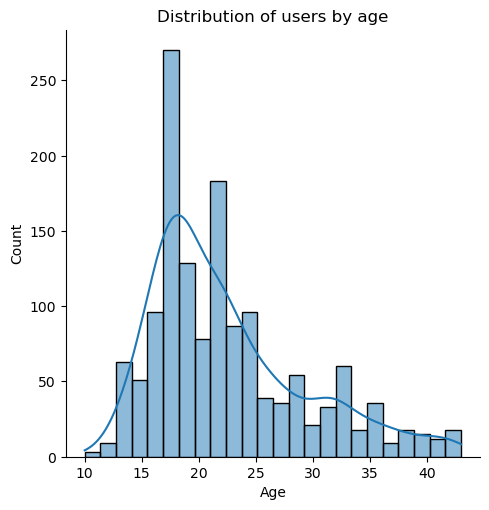

In [44]:
data=ds1

sns.displot(data,x='Age',kde=True)
plt.title("Distribution of users by age")

<BarContainer object of 5 artists>

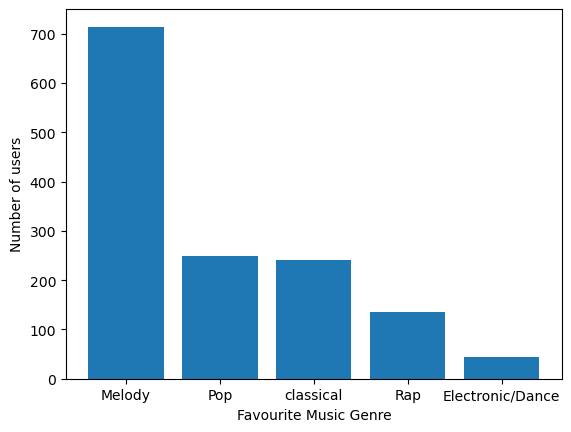

In [45]:
l1=ds1['fav_music_genre'].value_counts().head().keys()
l2=ds1['fav_music_genre'].value_counts().head()

plt.xlabel('Favourite Music Genre')
plt.ylabel('Number of users')
plt.bar(l1,l2)

<Axes: xlabel='music_time_slot', ylabel='count'>

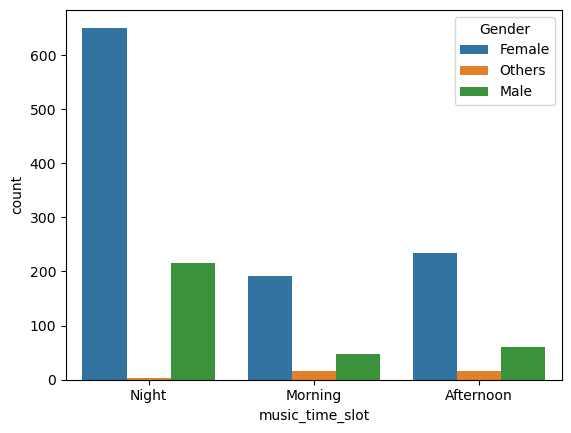

In [46]:
data=ds1
sns.countplot(data,x='music_time_slot',hue='Gender')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Melody'),
  Text(1, 0, 'Pop'),
  Text(2, 0, 'Classical & melody, dance'),
  Text(3, 0, 'classical'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'Rap'),
  Text(6, 0, 'Old songs'),
  Text(7, 0, 'Electronic/Dance'),
  Text(8, 0, 'All'),
  Text(9, 0, 'Kpop'),
  Text(10, 0, 'trending songs random')])

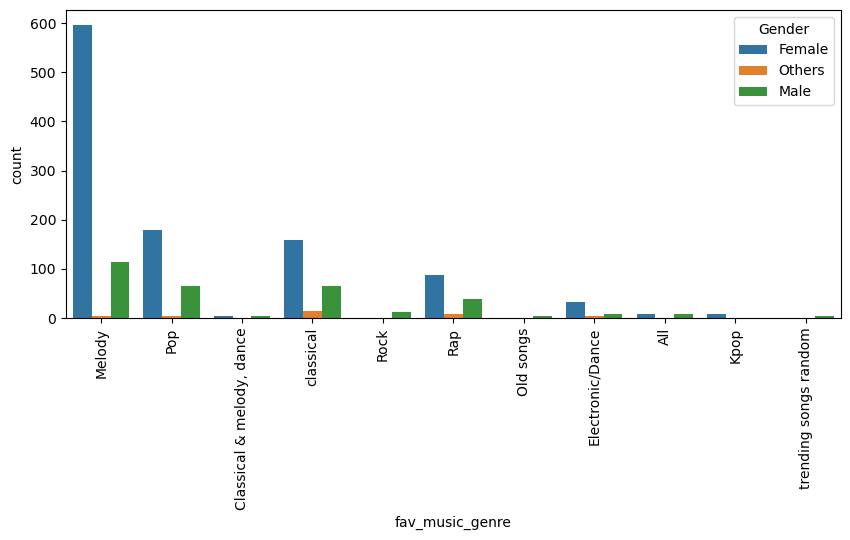

In [47]:
data=ds1
pt=(10,4)
plt.figure(figsize=pt)
sns.countplot(data,x='fav_music_genre',hue='Gender')
plt.xticks(rotation = 90)

([<matplotlib.patches.Wedge at 0x286793e49d0>,
 [Text(0.5520857289507021, 0.9514206997374884, ''),
  Text(-1.0693532116452458, 0.25784434983919774, ''),
  Text(-0.3136875986236319, -1.0543244711519026, ''),
  Text(0.9210911298814088, -0.6013244801717206, '')],
 [Text(0.30113767033674654, 0.5189567453113573, '33.3%'),
  Text(-0.5832835699883158, 0.1406423726395624, '25.9%'),
  Text(-0.171102326521981, -0.5750860751737651, '22.4%'),
  Text(0.5024133435716774, -0.3279951710027566, '18.4%')])

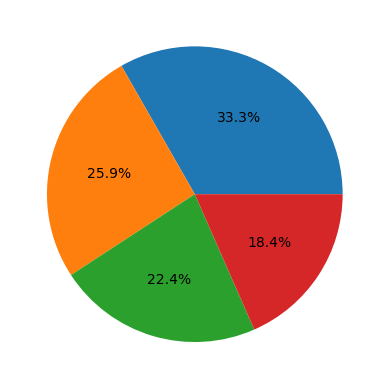

In [48]:
l3 = ds1['spotify_usage_period'].value_counts().head().keys()
l4 = ds1['spotify_usage_period'].value_counts().head()

plt.pie(l4,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2867944c370>,
 [Text(0.18645540811561334, 1.0840822758372357, 'Relaxation and stress relief'),
  Text(-1.092915940369366, -0.1246384663197701, 'Uplifting and motivational'),
  Text(-0.6830450111386719, -0.8622351841339878, 'Sadness or melancholy'),
  Text(-0.029141492485161364, -1.0996139201627713, 'Relaxation and stress relief, Uplifting and motivational'),
  Text(0.5667401365619347, -0.9427648792831433, 'Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties'),
  Text(0.9362688075624267, -0.5774086247932496, 'Relaxation and stress relief, Sadness or melancholy'),
  Text(1.0847802449939465, -0.1823508159314718, 'Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy')],
 [Text(0.10170294988124363, 0.5913176050021285, '44.6%'),
  Text(-0.5961359674741996, -0.06798461799260186, '14.5%'),
  Text(-0.37257000607563917, -0.47031010043672056, '10.6%'),
  Text(-0.01589535953736074,

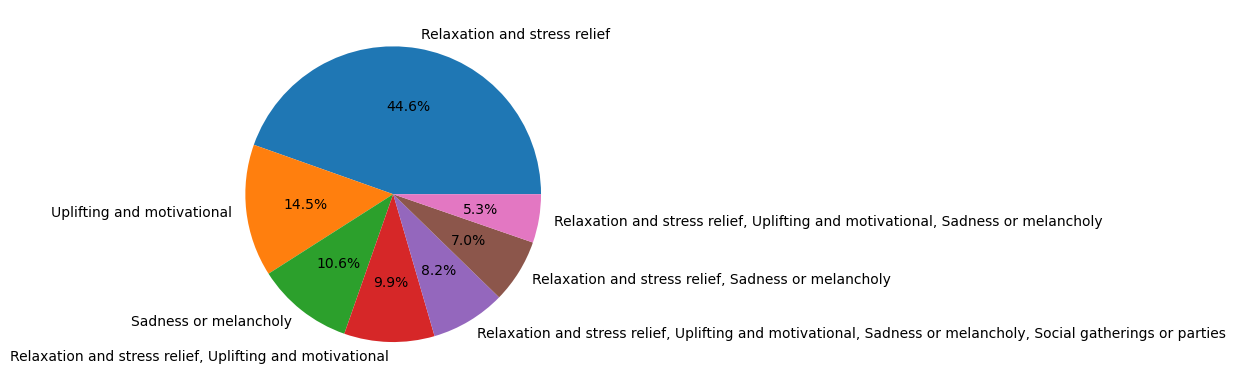

In [49]:
l5 = ds1['music_Influencial_mood'].value_counts().head(7).keys()
l6 = ds1['music_Influencial_mood'].value_counts().head(7)
plt.pie(l6,labels=l5,autopct='%1.1f%%')

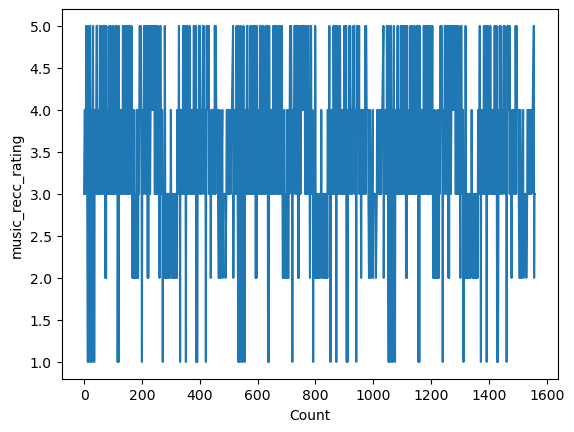

In [50]:
ds1['music_recc_rating'].plot()
plt.ylabel('music_recc_rating')
plt.xlabel('Count')
plt.show()

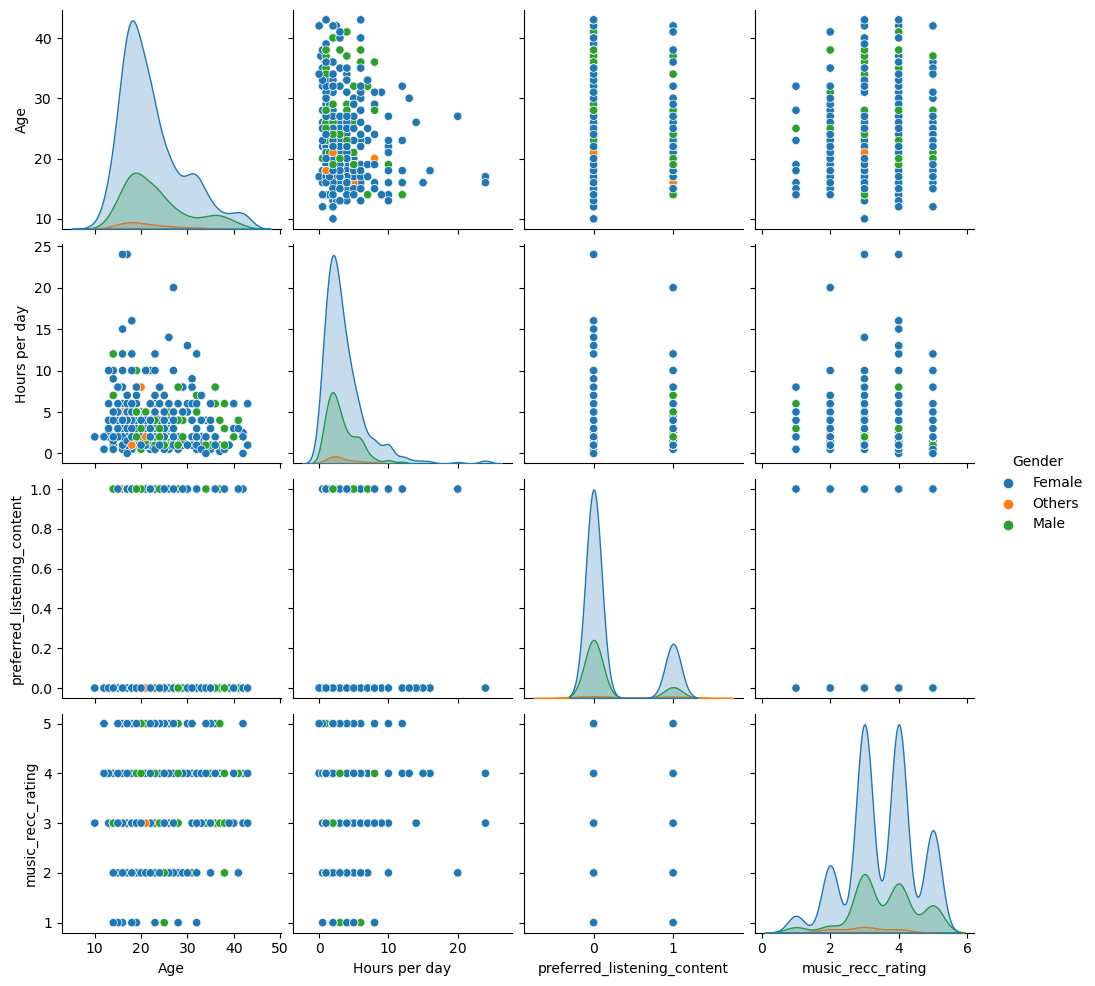

In [51]:
data=ds1
sns.pairplot(data,hue="Gender")

<Axes: >

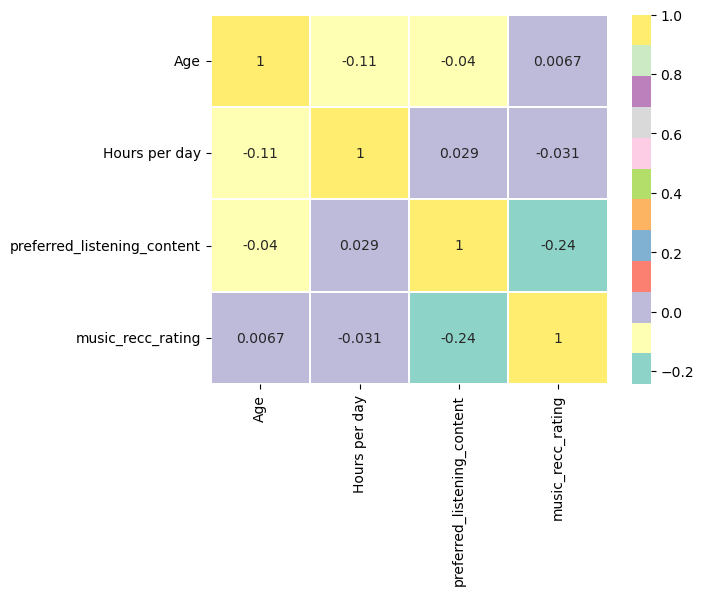

In [52]:
correlations=ds1.corr()
sns.heatmap(correlations, annot=True, cmap="Set3", linewidths=.20)

### Some of the queries listed below

##### 1. Which gender is spending more time in listening the music?

In [53]:
ds['Gender'].value_counts()

Female    1173
Male       342
Others      45
Name: Gender, dtype: int64

######  Female users are more when compared to male and other users.
###### Here is the represntation for the above query:

([<matplotlib.patches.Wedge at 0x2867a4bb1c0>,
 [Text(-0.7803692502900451, 0.7752572690415442, 'Female'),
  Text(0.7223314456896126, -0.8296006765715385, 'Male'),
  Text(1.0971265422611898, -0.07945659359679211, 'others')],
 [Text(-0.4256559547036609, 0.4228676012953877, '75.1%'),
  Text(0.39399897037615234, -0.4525094599481118, '22.6%'),
  Text(0.5984326594151944, -0.04333996014370478, '2.3%')])

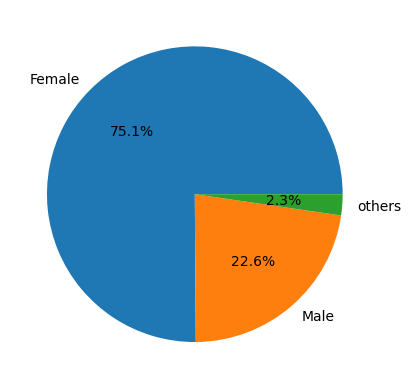

In [54]:
d1=ds1['Gender'].value_counts()
plt.pie(d1,labels=['Female','Male','others'],autopct='%1.1f%%')

##### 2. which time slot is more preferable for the users?


In [55]:
ds['music_time_slot'].value_counts()

Night        936
Afternoon    351
Morning      273
Name: music_time_slot, dtype: int64

###### The users are prefered to listen the music in night times only

###### Here is the represntation for the above query:

##### 3. Age group distrubution in the users?

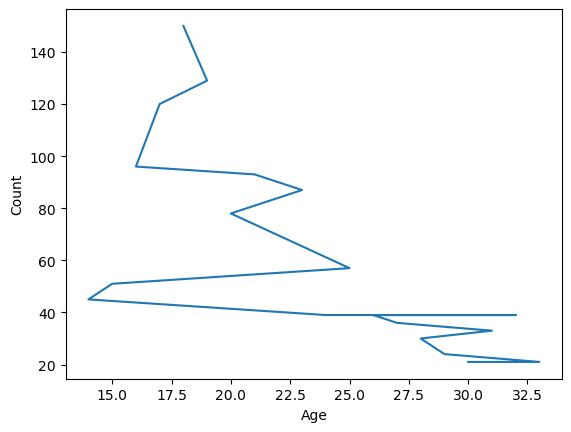

In [56]:
d2=ds1['Age'].value_counts().head(20).keys()
d3=ds1['Age'].value_counts().head(20)
y1=np.array(d2)
y2=np.array(d3)
plt.xlabel('Age')
plt.ylabel('Count')
plt.plot(y1,y2)
plt.show()

##### Most of the users in between the age groups 18-23 are there in the dataset

In [57]:
pip install wordcloud 

##### 4. In which device they are using the spotify?

In [58]:
ds1['spotify_listening_device'].value_counts()

Smartphone                                                                              837
Smartphone, Computer or laptop                                                          141
Computer or laptop                                                                      141
Smart speakers or voice assistants                                                      111
Computer or laptop, Smart speakers or voice assistants                                   36
Smartphone, Smart speakers or voice assistants                                           27
Smartphone, Wearable devices                                                             24
Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices     24
Smartphone, Computer or laptop, Smart speakers or voice assistants                       18
Wearable devices                                                                         18
Smartphone, Computer or laptop, Wearable devices                                

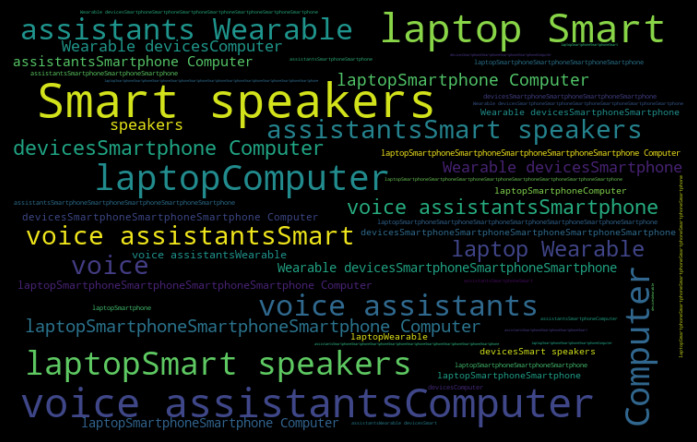

In [59]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

stopwords = set(STOPWORDS)
mask = np.array(Image.open('spotify.png'))

df1=pd.read_csv('Music_dataset.csv')

wordcloud = WordCloud(stopwords=stopwords, width=600, height=400,mask=mask, background_color="black").generate(''.join(df1['spotify_listening_device'])) 
plt.figure(figsize=(15,7), facecolor='k')
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('Off')
plt.tight_layout (pad=10)
plt.show()


##### From this representation we can say that most of the users using computer and smart speakers to listen the music.

<Axes: xlabel='music_time_slot', ylabel='count'>

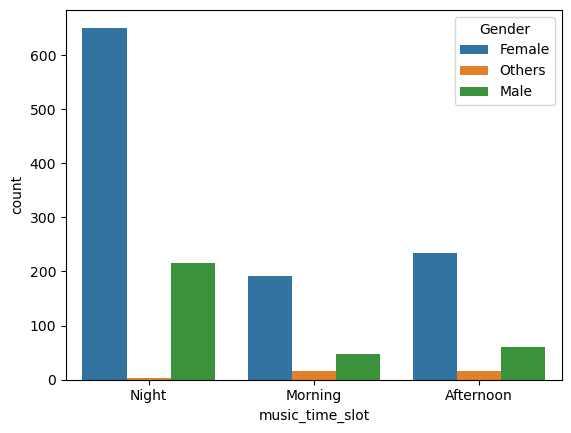

In [60]:
data=ds1
sns.countplot(data,x='music_time_slot',hue='Gender')

In [61]:
ds1

,Age,Gender,spotify_usage_period,Hours per day,spotify_listening_device,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,frequently_lis_music,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,pod_variety_satisfaction,Music effects
0,18.0,Female,More than 2 years,3.0,Smart speakers or voice assistants,1,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Ok,Improve
2,18.0,Others,6 months to 1 year,4.0,Smart speakers or voice assistants,1,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Satisfied,No effect
4,18.0,Female,1 year to 2 years,4.0,Smartphone,0,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Ok,Improve
5,18.0,Male,More than 2 years,5.0,Smartphone,0,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,Ok,Improve
6,18.0,Female,1 year to 2 years,3.0,Smartphone,0,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,None,Ok,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,43.0,Female,More than 2 years,1.0,Smartphone,0,Melody,Night,Relaxation and stress relief,Office hours,recommendations,4,Rarely,Educational,Satisfied,Improve
1555,22.0,Female,More than 2 years,2.0,"Smartphone, Computer or laptop, Wearable devices",0,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Ok,Improve
1556,24.0,Female,More than 2 years,1.0,"Smartphone, Computer or laptop",0,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Ok,Improve
1557,19.0,Female,More than 2 years,8.0,Smartphone,0,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Ok,Improve


##### 5. Printing only required columns and performing head function.

In [62]:
ds1[["spotify_usage_period", "music_Influencial_mood","frequently_lis_music"]].head(15)

,spotify_usage_period,music_Influencial_mood,frequently_lis_music
0,More than 2 years,Sadness or melancholy,leisure time
2,6 months to 1 year,Relaxation and stress relief,"Study Hours, While Traveling"
4,1 year to 2 years,Relaxation and stress relief,leisure time
5,More than 2 years,Uplifting and motivational,Workout session
6,1 year to 2 years,Relaxation and stress relief,Office hours
7,Less than 6 months,Social gatherings or parties,leisure time
8,Less than 6 months,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time"
9,More than 2 years,Relaxation and stress relief,"Office hours, While Traveling, Workout session"
10,More than 2 years,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time"
11,1 year to 2 years,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time"


##### 6. ratio blw podcast and music?


In [63]:
ds['preferred_listening_content'].value_counts()

Music      1230
Podcast     330
Name: preferred_listening_content, dtype: int64

([<matplotlib.patches.Wedge at 0x2867acf9f90>,
 [Text(-0.8659018872996691, 0.6783906850560901, 'Music'),
  Text(0.8659019508151851, -0.6783906039845017, 'Podcast')],
 [Text(-0.472310120345274, 0.37003128275786734, '78.8%'),
  Text(0.47231015499010087, -0.3700312385370009, '21.2%')])

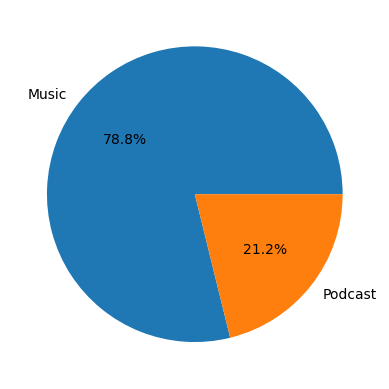

In [64]:
df2=ds['preferred_listening_content'].value_counts()
plt.pie(df2,labels=['Music','Podcast'],autopct='%1.1f%%')

##### The pie chart shows that the ratio between music and podcasts is nearly 3:1

##### 7. How many hours did the users use the spotify?

In [65]:
ds1['Hours per day'].value_counts()

2.00     348
3.00     243
1.00     204
4.00     159
5.00     114
6.00      96
0.50      48
8.00      45
10.00     42
1.50      33
7.00      27
2.50      15
12.00     15
0.00       9
24.00      6
9.00       6
0.25       3
0.70       3
4.50       3
20.00      3
16.00      3
15.00      3
14.00      3
13.00      3
Name: Hours per day, dtype: int64

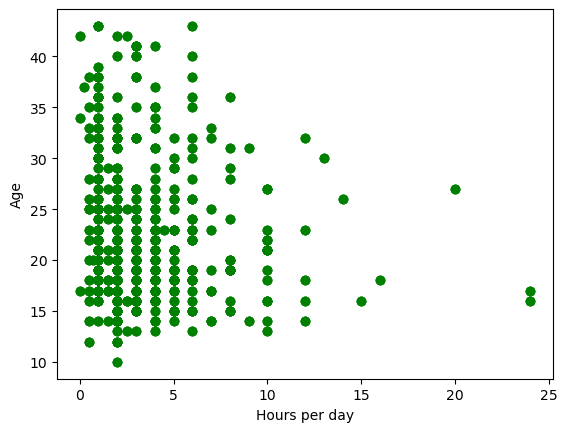

In [66]:
x=ds1['Hours per day']
y=ds1['Age']
plt.ylabel('Age')
plt.xlabel('Hours per day')
plt.scatter(x,y,c='green')
plt.show()

##### 8. pie chart for frequently_lis_music

([<matplotlib.patches.Wedge at 0x2867af0d120>,
 [Text(0.6780918147992521, 0.8661359539369423, 'While Traveling'),
  Text(-0.8956862552973578, 0.638550023155114, 'leisure time'),
  Text(-0.8721875937808312, -0.6702900873911266, 'While Traveling, leisure time'),
  Text(0.07892070465195342, -1.0971652210935412, 'While Traveling, Workout session, leisure time'),
  Text(0.7457740232289247, -0.8085920518264716, 'Workout session'),
  Text(1.0035568428694164, -0.450414989903722, 'Study Hours'),
  Text(1.0900447339454662, -0.14765662192315615, 'Office hours')],
 [Text(0.3698682626177738, 0.47243779305651395, '28.9%'),
  Text(-0.4885561392531042, 0.3483000126300621, '22.6%'),
  Text(-0.4757386875168169, -0.36561277494061445, '18.0%'),
  Text(0.04304765708288368, -0.5984537569601134, '13.4%'),
  Text(0.40678583085214076, -0.44105021008716633, '8.0%'),
  Text(0.5473946415651361, -0.2456809035838483, '4.9%'),
  Text(0.5945698548793451, -0.08053997559444881, '4.3%')])

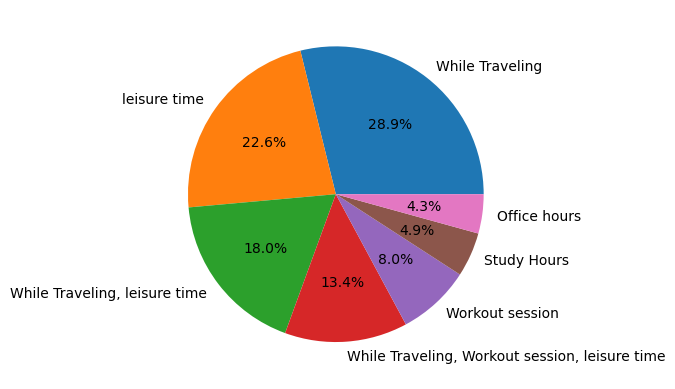

In [67]:
l7 = ds1['frequently_lis_music'].value_counts().head(7).keys()
l8 = ds1['frequently_lis_music'].value_counts().head(7)
plt.pie(l8,labels=l7,autopct='%1.1f%%')

##### 9. How many users asking for the improvement in music effects?

<BarContainer object of 3 artists>

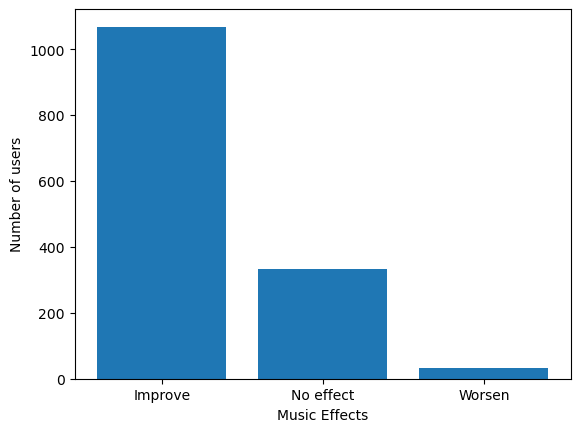

In [68]:
l9=ds1['Music effects'].value_counts().head().keys()
l10=ds1['Music effects'].value_counts().head()

plt.xlabel('Music Effects')
plt.ylabel('Number of users')
plt.bar(l9,l10)

##### 10. for rating of the spotify

<BarContainer object of 5 artists>

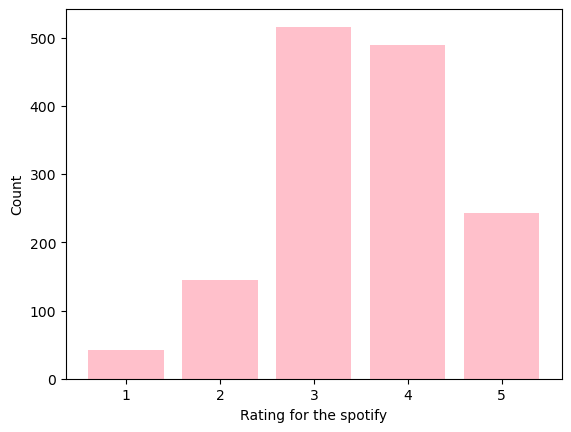

In [69]:
l11=ds1['music_recc_rating'].value_counts().head().keys()
l12=ds1['music_recc_rating'].value_counts().head()

plt.xlabel('Rating for the spotify')
plt.ylabel('Count')
plt.bar(l11,l12,color='pink')